In [1]:
import pandas as pd

In [2]:
#read csv file directly from a url & save the result
#python counts index from 0 , we've ignored it by making index_col=0
data = pd.read_csv(r"D:\python\scikitlearn-ML\CSV file\Real estate.csv",index_col = 0)

#display the 1st 5 rows
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [93]:
#display the last 5 rows
data.tail()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


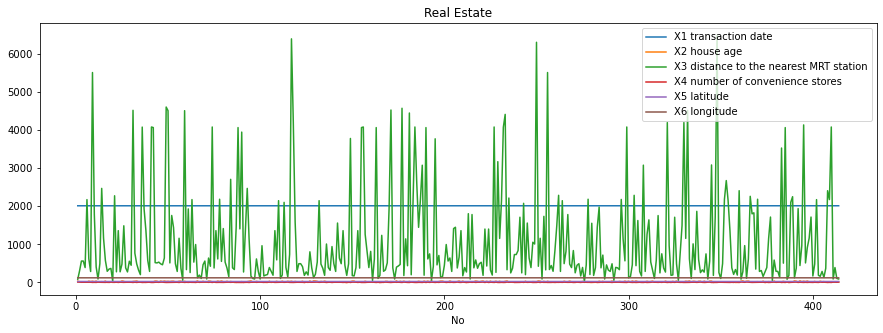

In [97]:
#plot all features by using pandas
#line plot by using pandas
#here drop 'price'
data.drop(['Y house price of unit area'],axis=1).plot.line(figsize=(15,5),title='Real Estate')

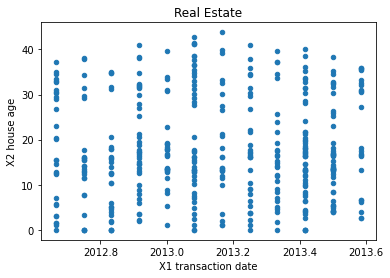

In [118]:
#scatter plot by using pandas

data.plot.scatter(x='X1 transaction date', y='X2 house age', title='Real Estate')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13C3DFA0>,
      dtype=object)

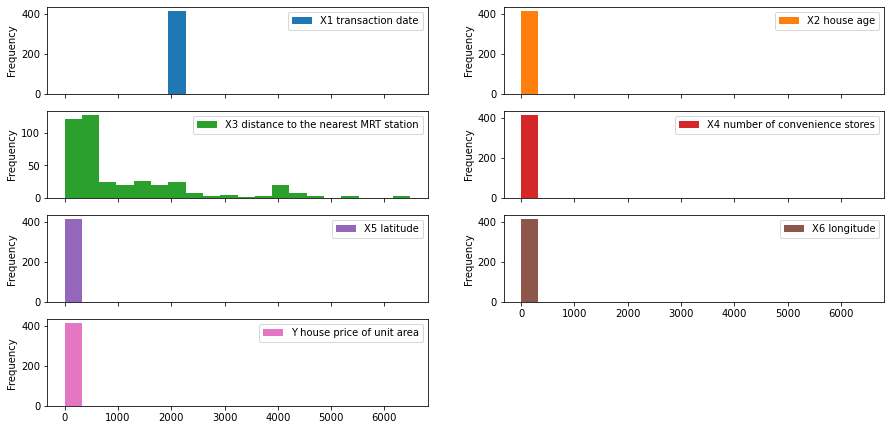

In [132]:
#histogram by using pandas 
#plot individual feature 
#It is a kind of bar graph. To construct a histogram, 
#the first step is to “bin” the range of values — that is, 
#divide the entire range of values into a series of intervals — and then count how many values fall into each interval.
#The bins are usually specified as consecutive, non-overlapping intervals of a variable.

data.plot.hist(subplots=True, layout=(8,2), figsize=(15, 15), bins=20)

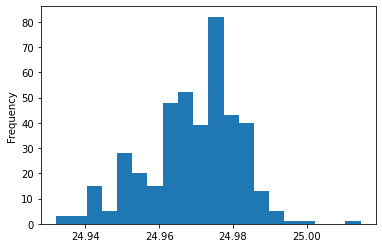

In [140]:
data['X5 latitude'].plot.hist(bins = 20)

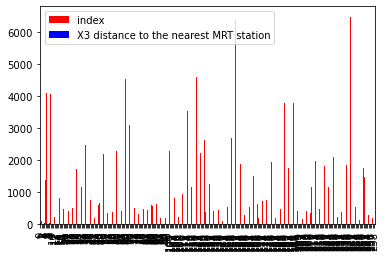

In [160]:
#bar chart of one feature
data['X3 distance to the nearest MRT station'].value_counts().sort_index().plot.bar()


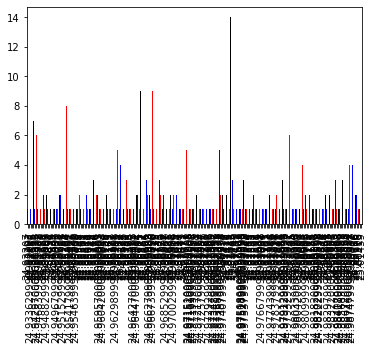

In [158]:
data['X5 latitude'].value_counts().sort_index().plot.bar(color=['red','black','blue'])

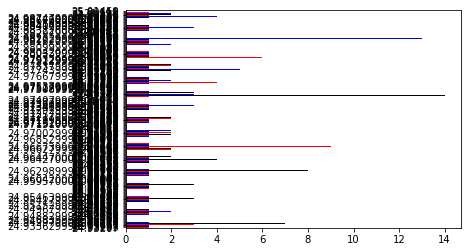

In [155]:
#horizontal bar chart
data['X5 latitude'].value_counts().sort_index().plot.barh(color=['red','black','blue'])

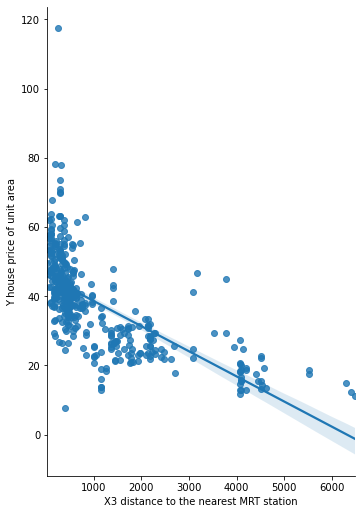

In [98]:
import seaborn as sns

#allow plots to appear within the notebook
%matplotlib inline

sns.pairplot(data, x_vars = ['X3 distance to the nearest MRT station'] , y_vars='Y house price of unit area' , height = 7,aspect=0.7,kind='reg')

In [99]:
#check the shape of dataframe
data.shape

(414, 7)

# prepare X & y using pandas

In [101]:
#create a python list of features name
feature_cols = ['X3 distance to the nearest MRT station']

#use the list to select a subset of original dataframe
X = data[feature_cols]

#equivalent command
#X = data[['latitude','longitude','sq__ft']]

X.head()

,X3 distance to the nearest MRT station
No,
1,84.87882
2,306.59470
3,561.98450
4,561.98450
5,390.56840


In [33]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(414, 2)


In [48]:
y = data['Y house price of unit area']

#another way to define response y
#y = data.price

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [102]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(414,)


In [103]:
#test dataset default 25%
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [104]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(310, 1)
(104, 1)
(310,)
(104,)


# Linear Regression with scikit learn

In [105]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

# interpreting model coefficients

In [106]:
print(linreg.intercept_)
print(linreg.coef_)

45.9896272769242
[-0.00716879]


In [108]:
#pair the features name with coefficients

list(zip(feature_cols , linreg.coef_))

[('X3 distance to the nearest MRT station', -0.007168787142158756)]

# Making predictions

In [109]:
y_pred = linreg.predict(X_test)


# Model evaluation metrics for regression

In [110]:
#define true & predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

#calculate mean absolute error by hand
print((10 + 0 + 20 + 10)/4)

#calculate MAE by scikitlearn
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


In [57]:
#calculate mean square error by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

#calculate MSE scikit
print(metrics.mean_squared_error(true,pred))

150.0
150.0


In [112]:
#calculate root mean square error by hand
import numpy as np
a = np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4)
print(a)
#calculate RME scikit
b = np.sqrt(metrics.mean_squared_error(true,pred))      
print(b)      

12.24744871391589
12.24744871391589


In [113]:
c = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(c)

9.027188999088672


In [60]:
y_test.shape
y_pred.shape

(104,)

In [114]:
print(y_test)
print(y_pred)

No
389    27.3
103    54.4
188    22.0
163    11.6
91     45.4
       ... 
165    55.2
229    46.6
40     46.2
262    24.4
186    21.5
Name: Y house price of unit area, Length: 104, dtype: float64
[29.8459631  44.6018612  23.92283875 16.83713068 44.02527637 33.67943618
 30.36461051 37.6391516  43.47444755 13.65582367 14.35545428 43.28129104
 38.42607653 44.86954586 45.34116704 33.20638942 44.02527637 42.16524995
 30.39122822 43.91551937 45.3954321  28.28526796 42.48538576 44.12817499
 42.75475653 35.84696198 30.39730018 45.23826598 43.18972555 16.72653063
 31.09726056 41.22192789 41.57078401 45.23826598 44.63101236 15.89972573
 42.52883722 43.01495626 35.938873   16.83713068 41.52008133 37.77183868
 45.34116704 30.59554582 33.71213302 34.80755954 32.88279754 42.31527475
 43.58430348 41.5613714  15.89972573 45.10254077 44.82869955 16.72653063
 43.55963855 44.1387468  44.02527637 40.61253224 43.5577675  42.46092586
 37.69693919 44.77000941 34.33258437 15.89972573 42.84359572 43.59978376
